# Austin Animal Center Needs Analysis

![Austin-shelter](./images/austin-animal-center.jpg)

## Overview

This project analyzes the resource needs of the [Austin Animal Center](https://www.austintexas.gov/department/aac) (AAC), which shelters 16,000 animals annually with a [No Kill policy](https://www.austintexas.gov/blog/no-kill-austin). Descriptive analysis of animal intake and outcome data shows that some animals require extended stays and that the number of sheltered animals varies seasonally. The Austin Animal Center can use this analysis to adjust outreach, hiring, and space utilization to improve resource allocation.

## Business Problem

![img](./images/animals.png)

The Austin Animal Shelter may be able to improve their resource allocation to both reduce costs and ensure that the center has staff and space to care for the animals brought to them. Doing so will allow the Austin Animal Shelter to better serve its clients while also freeing up resources to expand the scope of services they can offer. Using AAC's animal intake and outcome data, I describe patterns in intakes, stays, and exits to anticipate AAC's outreach, space, and staffing needs for supporting sheltered animals.

## Data Understanding

![img2](./images/pet-resource-center-og.jpg)

The Austin Animal Center has the longest running public dataset of animal rescues in the country. Every animal has a unique ID associated with both their [intake](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and [outcome](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) data. The data files provide the dates and types of each event, as well as other animal characteristics (e.g. type, sex). 

In [1]:
import pandas as pd
import numpy as np

In [2]:
intakes = pd.read_csv('./data/Austin_Animal_Center_Intakes_082620.csv')
outcomes = pd.read_csv('./data/Austin_Animal_Center_Outcomes_082620.csv')

### Intake and Outcome Data

The intake and outcome datasets include records from October 2013 to August 2020, and includes a wide variety of intake types, intake conditions, outcome types, and animal types.

In [3]:
intakes.head(3)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White


In [4]:
outcomes.head(3)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


## Data Preparation

In [5]:
import code.data_preparation as dp

### Data Cleaning

For the intake and outcome files, I make them easier to work with by normalizing column names and dropping unnecessary columns.

Combining the two files yields a single dataset for feature engineering and analysis. I exclude any unmatched outcome or intake data to ensure there are no missing values for the date features. I also exclude mismatched data so that analyses of stay lengths do not end including animals with negative numbers of days in shelter.

Before merging the datasets, I create a new `event_num` variable indexing the count of the intake or outcome for each animal ID. This will allow for a 1:1 merge.

In [6]:
intakes = dp.prep_intakes(intakes)
outcomes = dp.prep_outcomes(outcomes)
animal_shelter_df = dp.merge(intakes,outcomes)

### Feature Engineering

I create a `days_in_shelter` feature to analyze the amount of time animals spend at AAC and `year_month` features for aggregating values by month in my analysis.

In [7]:
animal_shelter_df = dp.feature_engineering(animal_shelter_df)

In [8]:
animal_shelter_df.head(3)

,animal_id,animal_type,breed,event_num,intake_condition,intake_date,intake_type,outcome_date,outcome_subtype,outcome_type,sex_upon_intake,days_in_shelter,intake_year_month,outcome_year_month,stay_length
0,A786884,Dog,Beagle Mix,1.0,Normal,2019-01-03 16:19:00,Stray,2019-01-08 15:11:00,Partner,Transfer,Neutered Male,4,2019-01,2019-01,Short
1,A706918,Dog,English Springer Spaniel,1.0,Normal,2015-07-05 12:59:00,Stray,2015-07-05 15:13:00,NaN,Return to Owner,Spayed Female,0,2015-07,2015-07,Short
2,A724273,Dog,Basenji Mix,1.0,Normal,2016-04-14 18:43:00,Stray,2016-04-21 17:17:00,NaN,Return to Owner,Intact Male,6,2016-04,2016-04,Short


In [9]:
# Save cleaned dataset as CSV
animal_shelter_df.to_csv('./data/cleaned_animal_center_df.csv')

## Analysis

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import code.visualizations as viz

%matplotlib inline

### Length of Stay

Most animals have short stays at AAC, with a median of 5 days. However, some animals take a very long time to exit - sometimes over 6 months! These extended stays may be partly a result of AAC's No Kill policy.

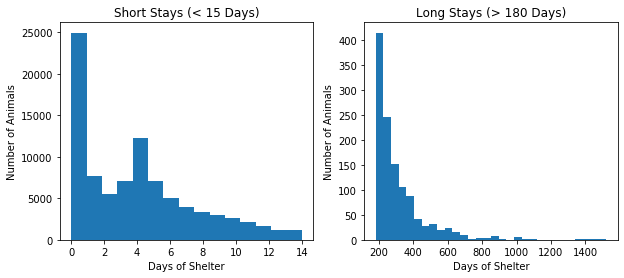

In [11]:
viz.length_of_stay(animal_shelter_df)

### Animals with Long Stays

AAC primarily shelters cats and dogs - cats have slightly longer stays, on average. However, dogs are more likely to have long stays of over 180 days.

In [12]:
animal_shelter_df[['animal_type','days_in_shelter']].groupby(['animal_type']).agg(['count', 'median', 'mean'])

days_in_shelter                  
                      count median       mean
animal_type                                  
Bird                    548      3   8.102190
Cat                   44176      6  21.204025
Dog                   67324      5  16.394881
Livestock                18     22  83.777778
Other                  6284      0   3.942234

In [13]:
stay_length_type_by_animal_type = pd.crosstab(animal_shelter_df['animal_type'], animal_shelter_df['stay_length'], normalize = 'columns')
stay_length_type_by_animal_type

stay_length,Long,Medium,Short
animal_type,,,
Bird,0.000833,0.004207,0.004816
Cat,0.312240,0.517378,0.328225
Dog,0.676103,0.463848,0.600826
Livestock,0.004163,0.000212,0.000079
Other,0.006661,0.014355,0.066055


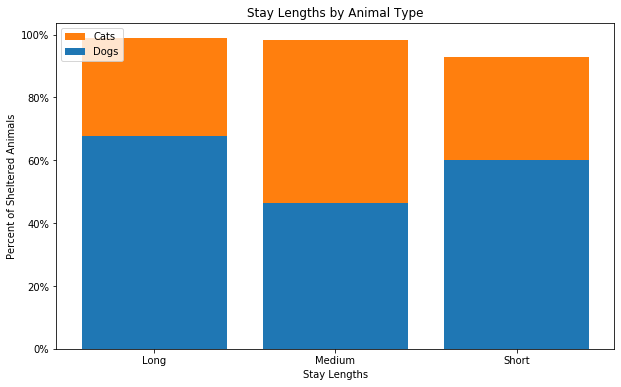

In [14]:
viz.stay_length_type_by_animal(animal_shelter_df)

### Seasonality of Intake and Exit Volume

The number of animal intakes typically peaks in the spring and bottoms out in the fall and winter. Animal exits follow a similar trend, but tend to lag behind intakes by about one month. This pattern does not seem to hold in 2020, possibly as a result of the COVID-19 pandemic.

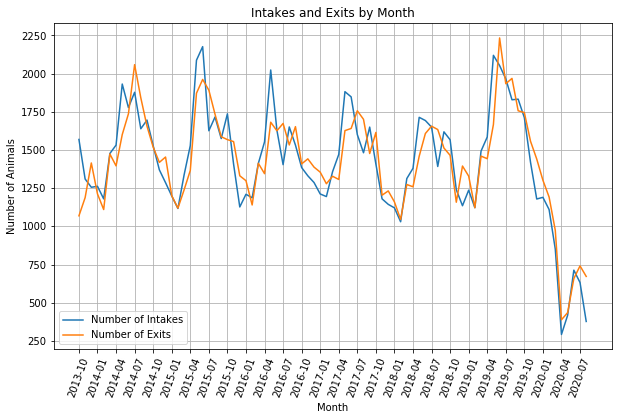

In [15]:
viz.seasonal_intake_exit(animal_shelter_df)

### Seasonality of Sheltered Animal Counts

The total number of sheltered animals typically peaks in May of each year and then hits its lowest point around January. There is often a secondary peak sometime after May before the number of sheltered animals drops rapidly. The number of sheltered animals has dropped precipitously in 2020, likely as a result of COVID-19.

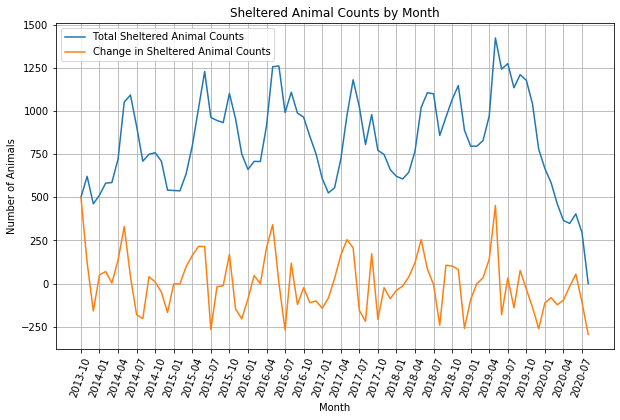

In [16]:
viz.seasonal_shelter_counts(animal_shelter_df)

## Conclusions

This analysis leads to three recommendations for improving operations of the Austin Animal Center:

- **Engage in targeted outreach campaigns for dogs that have been sheltered at AAC for more than 30 days.** While most dogs will have been placed after 30 days, this may help reduce the number of dogs that end up having extended stays, potentially requiring many more months of care.
- **Reduce current spending until the numbers of intakes and sheltered animals return to normal.** Given the reduced activity during this period, AAC should consider ways to temporarily reduce costs by changing space utilization or staffing.
- **Hire seasonal staff and rent temporary space for May through December.** To accommodate the high volume of intakes and number of sheltered animals in the spring and fall, AAC should leverage seasonal resources, rather than full-year ones. This will allow AAC to cut back on expenditures during the months when there is lower

### Next Steps

Further analyses could yield additional insights to further improve operations at AAC:

- **Better prediction of animals that are likely to have long stays.** This modeling could use already available data, such as breed and intake condition.
- **Model need for medical support.** This modeling could predict the need for specialized personnel to address animals' medical needs, including neutering, using intake condition and sex data.
- **Predicting undesirable outcomes.** This modeling could identify animals that are more likely to have undesirable outcomes (e.g. Euthanasia) for targeted medical support or outreach.